In [2]:
from ast import literal_eval
import pandas
import matplotlib.pyplot as plt
import numpy as np
from time import time
df = pandas.read_csv("../data/bbtop15-lyrics-tokenized.csv",converters={"tokens_lower_clean_stopfree_stem": literal_eval} )

#drop rows where the text is missing.
df = df.dropna(subset=['lyrics'])

#view the dataframe
df

,track_id,track,artist,artist_gender,date,year,lyrics,lyrics_clean,tokens,tokens_lower,tokens_lower_clean,tokens_lower_clean_stopfree,tokens_lower_clean_stopfree_stem
0,0,Me So Horny,The 2 Live Crew,Male,1989-11-04,1989,"\n\n[Intro]\n""What'll we get for 10 dollars?""\...","\n\n\n""Whatll we get for 10 dollars?""\n""Every ...","['""Whatll', 'we', 'get', 'for', '10', 'dollars...","['""whatll', 'we', 'get', 'for', '10', 'dollars...","['whatll', 'we', 'get', 'for', '10', 'dollars'...","['whatll', 'get', 'dollars', 'every', 'ting', ...","[whatll, get, dollar, everi, ting, want, every..."
1,1,Bust A Move,Young M.C.,Male,1989-11-04,1989,\n\n[Intro]\nBust it\n\n[Verse 1]\nThis here's...,\n\n\nBust it\n\n\nThis heres a jam for all th...,"['Bust', 'it', 'This', 'heres', 'a', 'jam', 'f...","['bust', 'it', 'this', 'heres', 'a', 'jam', 'f...","['bust', 'it', 'this', 'heres', 'a', 'jam', 'f...","['bust', 'heres', 'jam', 'fellas', 'tryin', 'l...","[bust, here, jam, fella, tryin, ladi, tell, us..."
2,2,Smooth Operator,Big Daddy Kane,Male,1989-11-04,1989,"\n\n[Verse 1]\nWell excuse me, take a few minu...","\n\n\nWell excuse me, take a few minutes, to m...","['Well', 'excuse', 'me,', 'take', 'a', 'few', ...","['well', 'excuse', 'me,', 'take', 'a', 'few', ...","['well', 'excuse', 'me', 'take', 'a', 'few', '...","['well', 'excuse', 'take', 'minutes', 'mellow'...","[well, excus, take, minut, mellow, big, daddi,..."
3,3,Cha Cha Cha,MC Lyte,Female,1989-11-04,1989,\n\n[Kick this one here for me and my DJ]\n\nY...,\n\n\n\nYou can cha-cha-cha to this Mardis Gra...,"['You', 'can', 'cha-cha-cha', 'to', 'this', 'M...","['you', 'can', 'cha-cha-cha', 'to', 'this', 'm...","['you', 'can', 'chachacha', 'to', 'this', 'mar...","['chachacha', 'mardis', 'gras', 'im', 'dopest'...","[chachacha, mardi, gras, im, dopest, femal, yo..."
4,4,I Go To Work,Kool Moe Dee,Male,1989-11-04,1989,\n\n[Verse 1]\nI go to work like a doctor\nWhe...,\n\n\nI go to work like a doctor\nWhen I rock ...,"['I', 'go', 'to', 'work', 'like', 'a', 'doctor...","['i', 'go', 'to', 'work', 'like', 'a', 'doctor...","['i', 'go', 'to', 'work', 'like', 'a', 'doctor...","['go', 'work', 'like', 'doctor', 'rock', 'mic'...","[go, work, like, doctor, rock, mic, got, like,..."
5,5,New Jack Swing,Wreckx-N-Effect,Male,1989-11-04,1989,"\n\nYo Wreckx-N-Effect\nIn full effect!\n(""Wor...","\n\nYo Wreckx-N-Effect\nIn full effect!\n(""Wor...","['Yo', 'Wreckx-N-Effect', 'In', 'full', 'effec...","['yo', 'wreckx-n-effect', 'in', 'full', 'effec...","['yo', 'wreckxneffect', 'in', 'full', 'effect'...","['yo', 'wreckxneffect', 'full', 'effect', 'wor...","[yo, wreckxneffect, full, effect, word, know, ..."
6,6,They Put Me In The Mix,M.C. Hammer,Male,1989-11-04,1989,\n\n[Hammer]\nYo! My Lone Mixer\nYou ready?\nB...,\n\n\nYo! My Lone Mixer\nYou ready?\nBust it!\...,"['Yo!', 'My', 'Lone', 'Mixer', 'You', 'ready?'...","['yo!', 'my', 'lone', 'mixer', 'you', 'ready?'...","['yo', 'my', 'lone', 'mixer', 'you', 'ready', ...","['yo', 'lone', 'mixer', 'ready', 'bust', 'lone...","[yo, lone, mixer, readi, bust, lone, mixer, sa..."
7,7,Just A Friend,Biz Markie,Male,1989-11-04,1989,\n\n[Intro]\nHave you ever met a girl that you...,\n\n\nHave you ever met a girl that you tried ...,"['Have', 'you', 'ever', 'met', 'a', 'girl', 't...","['have', 'you', 'ever', 'met', 'a', 'girl', 't...","['have', 'you', 'ever', 'met', 'a', 'girl', 't...","['ever', 'met', 'girl', 'tried', 'date', 'year...","[ever, met, girl, tri, date, year, make, love,..."
8,8,It's Funky Enough,The D.O.C.,Male,1989-11-04,1989,\n\n[Intro]\nY'all ready for this\nRastafara S...,\n\n\nYall ready for this\nRastafara Sonna Mad...,"['Yall', 'ready', 'for', 'this', 'Rastafara', ...","['yall', 'ready', 'for', 'this', 'rastafara', ...","['yall', 'ready', 'for', 'this', 'rastafara', ...","['yall', 'ready', 'rastafara', 'sonna', 'madda...","[yall, readi, rastafara, sonna, madda, fa, dro..."
9,9,Somebody For Me,Heavy D & The Boyz,Male,1989-11-04,1989,\n\nOh yeah..\n\nLove somebo-dy...\n\

In [39]:
## Join stems back into list

df['lyrics_stemmed'] = df['tokens_lower_clean_stopfree_stem'].apply(lambda x: " ".join(x))
df['lyrics_stemmed'][0]



'whatll get dollar everi ting want everyth everi ting ahh horni love long time sit home dick hard got black book freak call pick telephon dial digit said yo marqui babi arriv hous knock door idea night store im like dog heat freak without warn appetit sex caus horni girl alway ask fuck much say what wrong babi doll quick nut caus your one shouldnt mad wont tell mama dont tell dad know hell disgust see pussi bust wont mama mad knew got ass im freak heat dog without warn appetit sex caus horni say im desper even call pervert say im dog leav fuck desert ill play heart like game ill blow mind your blow brain im like man call georgi puddin pie fuck girl make em cri im like dog heat freak without warn appetit sex caus horni true virgin met first make hot wettywetti tell parent go never movi straight hous said like like put lip dick suck asshol im freak heat dog without warn appetit sex caus horni fucki sucki fucki sucki'

In [90]:
####Adopted From: 
#Author: Olivier Grisel <olivier.grisel@ensta.org>
#         Lars Buitinck
#         Chyi-Kwei Yau <chyikwei.yau@gmail.com>
# License: BSD 3 clause

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation, NMF

n_samples = 2317
n_topics = 6
n_top_words = 50
n_features = 1000

##This is a function to print out the top words for each topic in a pretty way.
#Don't worry too much about understanding every line of this code.
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
    print()

## Non-negative Matrix Factorization

Notes: 

- Removed stopwords using nltk 
- Removed digits from the text
- removed punctuation using nltk 
- Stemmed using nltk


In [110]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=70, max_features=None,
                                   stop_words="english")

In [111]:
tfidf = tfidf_vectorizer.fit_transform(df.lyrics_stemmed)

In [112]:
# Fit the NMF model
print("Fitting the NMF model with tf-idf features, "
      "n_samples=%d ..."
      % (n_samples))
t0 = time()
nmf = NMF(n_components=n_topics, random_state=1,
          alpha=.1, l1_ratio=.5).fit(tfidf)
print("done in %0.3fs." % (time() - t0))

Fitting the NMF model with tf-idf features, n_samples=2317 ...
done in 0.801s.


In [113]:
##Print number of features. 

print(len(tfidf_vectorizer.get_feature_names()))
print(len(tfidf_vectorizer.get_stop_words()))

1035
318


In [115]:
print("\nTopics in NMF model:")
tfidf_feature_names = tfidf_vectorizer.get_feature_names()
print_top_words(nmf, tfidf_feature_names, n_top_words)


Topics in NMF model:

Topic #0:
im know got like girl dont babi let aint yeah want caus wanna say time right make need tell come man feel way gotta good thing said look think ya life day night money boy ill hey gonna realli everi work tri talk friend littl bodi em mind gon ride

Topic #1:
nigga bitch fuck shit money ass im yall got like aint hoe dont motherfuck fuckin pussi dick em real gon hood know street ho dog smoke big rich gun wit thug stay club hit hundr bout die young boy yeah yo new bad look game pull kill motherfuckin lil ball

Topic #2:
like im yo rhyme ya caus mic rock style funki rap em funk yall come check lyric make shit mcs word dont man wit flow beat brother black kick chorus ill kid yes crew step hit sound track time rapper play sucker stop peopl vers got mc hiphop tri new

Topic #3:
love babi heart ill kiss true girl crazi away lovin hurt want ladi togeth trust dont forev rememb bitch thug cri lot alway im world long hold day thing dream crew eye need make chick fee

### Document by Topic Distribution
One thing we may want to do with the output is find the most representative texts for each topic. A simple way to do this (but not memory efficient), is to merge the topic distribution back into the Pandas dataframe.
First get the topic distribution array.

In [116]:
topic_dist = nmf.transform(tfidf)
topic_dist

array([[ 0.0608547 ,  0.00920715,  0.02951388,  0.00825076,  0.        ,
         0.        ],
       [ 0.09458823,  0.        ,  0.        ,  0.00368973,  0.        ,
         0.        ],
       [ 0.03635167,  0.        ,  0.08296201,  0.00165648,  0.        ,
         0.        ],
       ..., 
       [ 0.06335315,  0.        ,  0.        ,  0.00114015,  0.        ,
         0.00498816],
       [ 0.05327559,  0.01371759,  0.        ,  0.01897437,  0.        ,
         0.        ],
       [ 0.02085176,  0.0494748 ,  0.0217397 ,  0.        ,  0.        ,
         0.00695269]])

In [117]:
topic_dist_df = pandas.DataFrame(topic_dist)
df_w_topics = topic_dist_df.join(df)
df_w_topics

,0,1,2,3,4,5,track_id,track,artist,artist_gender,date,year,lyrics,lyrics_clean,tokens,tokens_lower,tokens_lower_clean,tokens_lower_clean_stopfree,tokens_lower_clean_stopfree_stem,lyrics_stemmed
0,0.060855,0.009207,0.029514,0.008251,0.000000,0.000000,0,Me So Horny,The 2 Live Crew,Male,1989-11-04,1989,"\n\n[Intro]\n""What'll we get for 10 dollars?""\...","\n\n\n""Whatll we get for 10 dollars?""\n""Every ...","['""Whatll', 'we', 'get', 'for', '10', 'dollars...","['""whatll', 'we', 'get', 'for', '10', 'dollars...","['whatll', 'we', 'get', 'for', '10', 'dollars'...","['whatll', 'get', 'dollars', 'every', 'ting', ...","[whatll, get, dollar, everi, ting, want, every...",whatll get dollar everi ting want everyth ever...
1,0.094588,0.000000,0.000000,0.003690,0.000000,0.000000,1,Bust A Move,Young M.C.,Male,1989-11-04,1989,\n\n[Intro]\nBust it\n\n[Verse 1]\nThis here's...,\n\n\nBust it\n\n\nThis heres a jam for all th...,"['Bust', 'it', 'This', 'heres', 'a', 'jam', 'f...","['bust', 'it', 'this', 'heres', 'a', 'jam', 'f...","['bust', 'it', 'this', 'heres', 'a', 'jam', 'f...","['bust', 'heres', 'jam', 'fellas', 'tryin', 'l...","[bust, here, jam, fella, tryin, ladi, tell, us...",bust here jam fella tryin ladi tell us get sho...
2,0.036352,0.000000,0.082962,0.001656,0.000000,0.000000,2,Smooth Operator,Big Daddy Kane,Male,1989-11-04,1989,"\n\n[Verse 1]\nWell excuse me, take a few minu...","\n\n\nWell excuse me, take a few minutes, to m...","['Well', 'excuse', 'me,', 'take', 'a', 'few', ...","['well', 'excuse', 'me,', 'take', 'a', 'few', ...","['well', 'excuse', 'me', 'take', 'a', 'few', '...","['well', 'excuse', 'take', 'minutes', 'mellow'...","[well, excus, take, minut, mellow, big, daddi,...",well excus take minut mellow big daddi kane mi...
3,0.045197,0.000000,0.056517,0.000000,0.000000,0.011225,3,Cha Cha Cha,MC Lyte,Female,1989-11-04,1989,\n\n[Kick this one here for me and my DJ]\n\nY...,\n\n\n\nYou can cha-cha-cha to this Mardis Gra...,"['You', 'can', 'cha-cha-cha', 'to', 'this', 'M...","['you', 'can', 'cha-cha-cha', 'to', 'this', 'm...","['you', 'can', 'chachacha', 'to', 'this', 'mar...","['chachacha', 'mardis', 'gras', 'im', 'dopest'...","[chachacha, mardi, gras, im, dopest, femal, yo...",chachacha mardi gras im dopest femal youv hear...
4,0.018671,0.000000,0.128871,0.000000,0.000000,0.000000,4,I Go To Work,Kool Moe Dee,Male,1989-11-04,1989,\n\n[Verse 1]\nI go to work like a doctor\nWhe...,\n\n\nI go to work like a doctor\nWhen I rock ...,"['I', 'go', 'to', 'work', 'like', 'a', 'doctor...","['i', 'go', 'to', 'work', 'like', 'a', 'doctor...","['i', 'go', 'to', 'work', 'like', 'a', 'doctor...","['go', 'work', 'like', 'doctor', 'rock', 'mic'...","[go, work, like, doctor, rock, mic, got, like,...",go work like doctor rock mic got like way oper...
5,0.040572,0.000000,0.038289,0.000000,0.000000,0.000000,5,New Jack Swing,Wreckx-N-Effect,Male,1989-11-04,1989,"\n\nYo Wreckx-N-Effect\nIn full effect!\n(""Wor...","\n\nYo Wreckx-N-Effect\nIn full effect!\n(""Wor...","['Yo', 'Wreckx-N-Effect', 'In', 'full', 'effec...","['yo', 'wreckx-n-effect', 'in', 'full', 'effec...","['yo', 'wreckxneffect', 'in', 'full', 'effect'...","['yo', 'wreckxneffect', 'full', 'effect', 'wor...","[yo, wreckxneffect, full, effect, word, know, ...",yo wreckxneffect full effect word know need kn...
6,0.000000,0.000000,0.010564,0.000000,0.000000,0.000000,6,They Put Me In The Mix,M.C. Hammer,Male,1989-11-04,1989,\n\n[Hammer]\nYo! My Lone Mixer\nYou ready?\nB...,\n\n\nYo! My Lone Mixer\nYou ready?\nBust it!\...,"['Yo!', 'My', 'Lone', 'Mixer', 'You', 'ready?'...","['yo!', 'my', 'lone', 'mixer', 'you', 'ready?'...","['yo', 'my', 'lone', 'mixer', 'you', 'ready', ...","['yo', 'lone', 'mixer', 'ready', 'bust', 'lone...","[yo, lone, mixer, readi, bust, lone, mixer, sa...",yo lone mixer readi bust lone mixer sampl scra...
7,0.063406,0.000000,0.000000,0.001720,0.000000,0.037848,7,Just A Friend,Biz Markie,Male,1989-11-04,1989,\n\n[Intro]\nHave you ever met a girl that you...,\n\n\nHave y

### Prevalence over time

In [118]:
df_w_topics['stem_count'] = df_w_topics['tokens_lower_clean_stopfree_stem'].apply(lambda x: len(x))
df_w_topics['stem_count']

0       176
1       335
2       245
3       209
4       379
5       187
6        64
7       292
8       315
9       192
10      267
11      371
12      195
13      364
14      377
15      366
16      280
17      229
18      453
19      328
20      359
21      504
22      302
23      406
24      290
25      242
26      299
27      400
28      404
29      318
       ... 
2287    416
2288    214
2289    256
2290    238
2291    225
2292    361
2293    343
2294    484
2295    342
2296    438
2297    384
2298    287
2299    260
2300    410
2301    721
2302    228
2303    181
2304    427
2305    293
2306    406
2307    312
2308    345
2309    539
2310    159
2311    103
2312    188
2313    711
2314    290
2315    285
2316    204
Name: stem_count, dtype: int64

In [119]:
df_w_topics['0_wc'] = df_w_topics[0] * df_w_topics['stem_count']
df_w_topics['0_wc']

0       10.710428
1       31.687057
2        8.906160
3        9.446115
4        7.076295
5        7.586899
6        0.000000
7       18.514642
8        2.414456
9        5.295116
10      15.600124
11       9.849711
12      13.897962
13       8.624814
14      17.486000
15       4.129562
16      13.208672
17       7.401347
18      26.703825
19      13.065428
20       5.339423
21      29.215525
22      13.679146
23      10.725944
24      16.254672
25      19.332570
26      15.683520
27      19.219038
28      18.001531
29       4.748057
          ...    
2287    13.826364
2288     7.750322
2289    19.427750
2290    16.560318
2291     9.102121
2292    16.329948
2293     3.862904
2294    30.415206
2295    14.212361
2296    11.089950
2297    36.990446
2298     9.519423
2299    15.427202
2300    12.689044
2301    30.263730
2302     7.579723
2303    14.377757
2304    13.060656
2305    14.686772
2306    16.852519
2307     5.633470
2308     8.111530
2309    35.599731
2310     8.724128
2311     6

In [122]:
topic_columns = range(0,6)
col_list = []
for num in topic_columns:
    col = "%d_wc" % num
    col_list.append(col)
    #Solution
    df_w_topics[col] = df_w_topics[num] * df_w_topics['stem_count']
    
df_w_topics

,0,1,2,3,4,5,track_id,track,artist,artist_gender,...,tokens_lower_clean_stopfree,tokens_lower_clean_stopfree_stem,lyrics_stemmed,stem_count,0_wc,1_wc,2_wc,3_wc,4_wc,5_wc
0,0.060855,0.009207,0.029514,0.008251,0.000000,0.000000,0,Me So Horny,The 2 Live Crew,Male,...,"['whatll', 'get', 'dollars', 'every', 'ting', ...","[whatll, get, dollar, everi, ting, want, every...",whatll get dollar everi ting want everyth ever...,176,10.710428,1.620458,5.194443,1.452133,0.000000,0.000000
1,0.094588,0.000000,0.000000,0.003690,0.000000,0.000000,1,Bust A Move,Young M.C.,Male,...,"['bust', 'heres', 'jam', 'fellas', 'tryin', 'l...","[bust, here, jam, fella, tryin, ladi, tell, us...",bust here jam fella tryin ladi tell us get sho...,335,31.687057,0.000000,0.000000,1.236059,0.000000,0.000000
2,0.036352,0.000000,0.082962,0.001656,0.000000,0.000000,2,Smooth Operator,Big Daddy Kane,Male,...,"['well', 'excuse', 'take', 'minutes', 'mellow'...","[well, excus, take, minut, mellow, big, daddi,...",well excus take minut mellow big daddi kane mi...,245,8.906160,0.000000,20.325692,0.405839,0.000000,0.000000
3,0.045197,0.000000,0.056517,0.000000,0.000000,0.011225,3,Cha Cha Cha,MC Lyte,Female,...,"['chachacha', 'mardis', 'gras', 'im', 'dopest'...","[chachacha, mardi, gras, im, dopest, femal, yo...",chachacha mardi gras im dopest femal youv hear...,209,9.446115,0.000000,11.812047,0.000000,0.000000,2.346005
4,0.018671,0.000000,0.128871,0.000000,0.000000,0.000000,4,I Go To Work,Kool Moe Dee,Male,...,"['go', 'work', 'like', 'doctor', 'rock', 'mic'...","[go, work, like, doctor, rock, mic, got, like,...",go work like doctor rock mic got like way oper...,379,7.076295,0.000000,48.842201,0.000000,0.000000,0.000000
5,0.040572,0.000000,0.038289,0.000000,0.000000,0.000000,5,New Jack Swing,Wreckx-N-Effect,Male,...,"['yo', 'wreckxneffect', 'full', 'effect', 'wor...","[yo, wreckxneffect, full, effect, word, know, ...",yo wreckxneffect full effect word know need kn...,187,7.586899,0.000000,7.160011,0.000000,0.000000,0.000000
6,0.000000,0.000000,0.010564,0.000000,0.000000,0.000000,6,They Put Me In The Mix,M.C. Hammer,Male,...,"['yo', 'lone', 'mixer', 'ready', 'bust', 'lone...","[yo, lone, mixer, readi, bust, lone, mixer, sa...",yo lone mixer readi bust lone mixer sampl scra...,64,0.000000,0.000000,0.676116,0.000000,0.000000,0.000000
7,0.063406,0.000000,0.000000,0.001720,0.000000,0.037848,7,Just A Friend,Biz Markie,Male,...,"['ever', 'met', 'girl', 'tried', 'date', 'year...","[ever, met, girl, tri, date, year, make, love,...",ever met girl tri date year make love want wai...,292,18.514642,0.000000,0.000000,0.502240,0.000000,11.051470
8,0.007665,0.000000,0.109308,0.000281,0.000000,0.000000,8,It's Funky Enough,The D.O.C.,Male,...,"['yall', 'ready', 'rastafara', 'sonna', 'madda...","[yall, readi, rastafara, sonna, madda, fa, dro...",yall readi rastafara sonna madda fa drop lyric...,315,2.414456,0.000000,34.432055,0.088565,0.000000,0.000000
9,0.027579,0.000000,0.036605,0.080710,0.000000,0.006464,9,Somebody For Me,Heavy D & The Boyz,Male,...,"['oh', 'yeah', 'love', 'somebody', 'al', 'b', ...","[oh, yeah, love, somebodi, al, b, sure, harmon...",oh yeah love somebodi al b sure harmon chorus ...,192,5.295116,0.000000,7.028180,15.496412,0.000000,1.241093


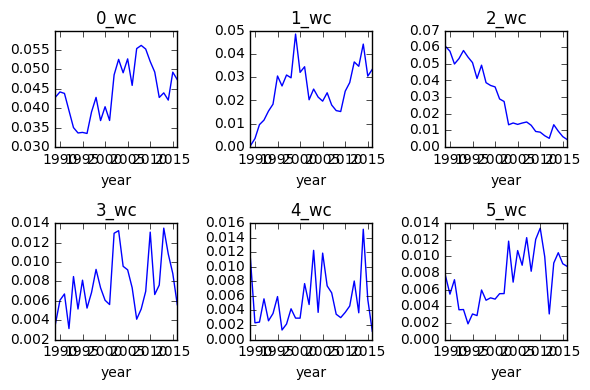

In [123]:
grouped_year = df_w_topics.groupby('year')
fig3 = plt.figure()
chrt = 0
for e in col_list:
    chrt += 1 
    ax2 = fig3.add_subplot(2,3, chrt)
    (grouped_year[e].sum()/grouped_year['stem_count'].sum()).plot(kind='line', title=e)
    
fig3.tight_layout()
plt.show()

### LDA